In [35]:
import pandas as pd
year18 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2018 - LOLB.csv")
year19 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2019 - LOLB.csv")
year21 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2021 - LOLB.csv")
year22 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2022 - LOLB.csv")
columns = ['TACKLES', 'TFL', 'SACKS', 'FF', 'TD', 'INT', 'PASS DEFLECTION', 'CATCH ALLOWED', 'DF%',
                                    'AGE',
                                    'SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
                                    'AGILITY', 'CATCH', 'CARRY', 'JUMP', 'BREAK TACKLE', 'TACKLE',
                                    'PASS BLOCK', 'RUN BLOCK', 'TOUGHNESS', 'PLAYER EGO','WGT', 'HGTIN',
                                    'COVERAGE','RUN STOPPER','BALANCED','PLAYMAKER','RUN STOPPING', 'PASS RUSHER','HEAVY HITTER','DEFENSIVE ENFORCER',
                                    'FORCE OF NATURE','TEAM LEADER','TEAM MENTOR','NFL ICON','NONE']

rawData = [year18,year19,year21,year22]
dfs = []
for rd in rawData:
    df = pd.DataFrame(rd,columns=columns)
    df = df.dropna(subset=['TACKLES'])
    df = df[~(df['TACKLES'] <= 20)]
    df['HGTIN'] = df['HGTIN'].astype(float)
    df = df.rename(columns={"PASS DEFLECTION": "DEFL", "CATCH ALLOWED": "CA"})
    dfs.append(df)
all_years = pd.concat(dfs)
correlation_matrix = all_years.corr()
correlation_matrix.to_clipboard()

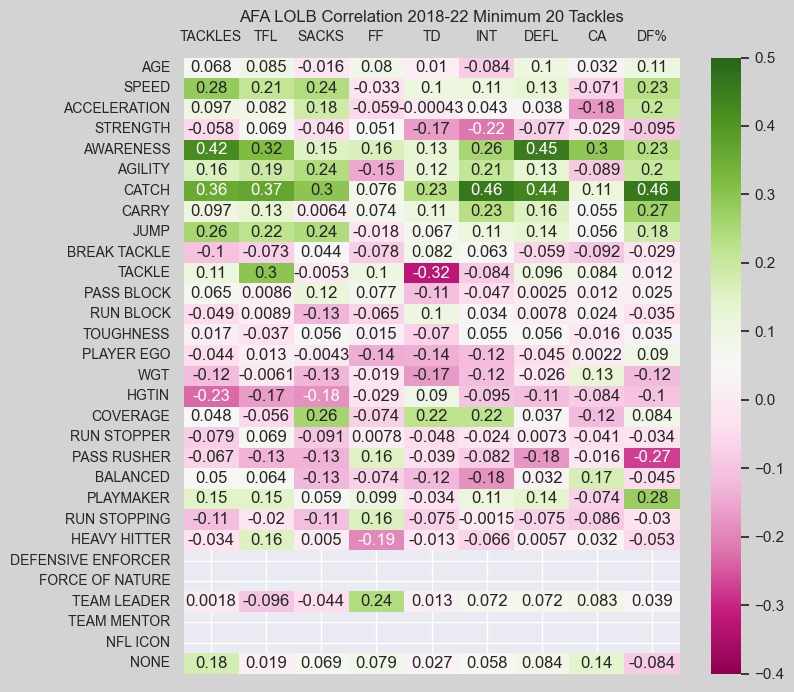

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
rows = ['AGE','SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
        'AGILITY', 'CATCH', 'CARRY', 'JUMP', 'BREAK TACKLE', 'TACKLE',
        'PASS BLOCK', 'RUN BLOCK', 'TOUGHNESS', 'PLAYER EGO','WGT', 'HGTIN',
        'COVERAGE','RUN STOPPER', 'PASS RUSHER','BALANCED','PLAYMAKER','RUN STOPPING','HEAVY HITTER','DEFENSIVE ENFORCER',
                                    'FORCE OF NATURE','TEAM LEADER','TEAM MENTOR','NFL ICON','NONE']
cols = ['TACKLES', 'TFL', 'SACKS', 'FF', 'TD', 'INT', 'DEFL', 'CA','DF%']
sns.set(rc={'figure.facecolor':'lightgrey'})
sns.heatmap(correlation_matrix.loc[rows,cols], annot=True, cmap='PiYG', vmin=-.4,vmax=.5)
plt.title("AFA LOLB Correlation 2018-22 Minimum 20 Tackles")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom = False, top = False, labeltop = True)
plt.show()